# Logistic Regression:

Linear regression is merely a base on top of which we build the regression models. Real world problems are more complex and often require sophisticated non-linear models such as:
 - Quadratic
 - Exponential
 - Logistic
 

A logistic regression is applied when the possible regression outcome (i.e. y_hat) is NOT NUMERIC rather CATEGORICAL. These categorical variables are represented through dummies. Here we are assuming that the predicted outcomes could have any 2 valid values such as 'Yes'/'No', 'Will Buy'/ 'Wont Buy', 'Pass'/'Fail', '0/1' etc...
In business context, the decision making often boils down to 'Yes'/'No' situation. 

Problem Statement: Consider a problem statement where a student gets admitted or not [DV] on the basis of the SAT score [IV]. 
The DV is categorical ['Gets Admitted'/ 'Doesnt get admitted']. Since the DV is categorical, we have to use logistic regression model for predictions. 

# Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()                                    # To override the default matpotlib plot style [kind of adding a skin to matplotlib charts]


# Load the data

In [2]:
df = pd.read_csv('Admittance.csv')                                        # Load the data

print("----------------------------------------------------")
print(df.head())                                                          # Print the top 5 rows
print("----------------------------------------------------")
#
print(df.columns)                                                         # ['SAT', 'Admitted']
print("----------------------------------------------------")
print(df.shape)                                                           # (168, 2)


----------------------------------------------------
    SAT Admitted
0  1363       No
1  1792      Yes
2  1954      Yes
3  1653       No
4  1593       No
----------------------------------------------------
Index(['SAT', 'Admitted'], dtype='object')
----------------------------------------------------
(168, 2)


# Inference:
1. Data has 2 columns- SAT (numeric) and Admitted (Categorical)
2. Here DV: Admitted and IV: SAT 
3. In order to fit the logistic regression model, we need to first map the Categorical variable to Dummy numeric values. 

# Data Mapping

In [3]:
# Create a copy of the original data frame
new_df = df.copy()
print(id(new_df))                  # 2515536379800
print(id(df))                      # 2515660033384

# Confirm that the DV has only 2 possible outcomes 'Yes' and 'No'
print(new_df.Admitted.unique())    # ['No' 'Yes']

# Map the column values
new_df.Admitted = new_df.Admitted.map({'Yes':1, 'No':0})

1760227379520
1760227860152
['No' 'Yes']


# Create the DV and IV

In [4]:
y = new_df.Admitted
x1 = new_df.SAT


# Let's plot the data

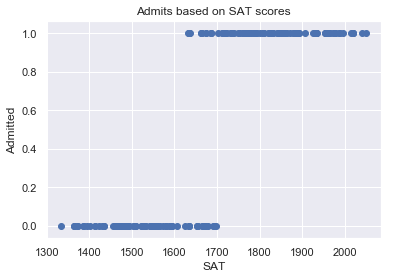

In [5]:
plt.scatter(x1, y, color='C0')  # Matplotlib color scheme {'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'}
                                #         {blue','orange','green','red','purple','brown','pink','gray','olive','cyan'} 

plt.title('Admits based on SAT scores', fontsize=12)
plt.xlabel('SAT', fontsize=12)
plt.ylabel('Admitted', fontsize=12)
plt.show()

# Inference:
1. This is a typical logistic regression curve. This plot is common when dealing with categorical variable. 
2. The students plotted at '0', are the ones who didnt get admitted. 
3. The students plotted at '1', are the ones who got admitted. 

# Plot a Linear regression line to fit the data

In [6]:
# The data is not linear...therefore fitting a linear regression model wont make much sense. Lets see how the fitted linear 
# regression line looks like. 
# Make provision for the constant term b0 - By using the statsmodels method - add_constant() which adds a new column 'const' 
# which contains all 1's. This new column simulates the variable 'x0'. 

x = sm.add_constant(x1)
print(x)

     const   SAT
0      1.0  1363
1      1.0  1792
2      1.0  1954
3      1.0  1653
4      1.0  1593
5      1.0  1755
6      1.0  1775
7      1.0  1887
8      1.0  1893
9      1.0  1580
10     1.0  1857
11     1.0  1880
12     1.0  1664
13     1.0  1364
14     1.0  1693
15     1.0  1850
16     1.0  1633
17     1.0  1634
18     1.0  1636
19     1.0  1855
20     1.0  1987
21     1.0  1997
22     1.0  1422
23     1.0  1508
24     1.0  1720
25     1.0  1879
26     1.0  1634
27     1.0  1802
28     1.0  1849
29     1.0  1764
..     ...   ...
138    1.0  1412
139    1.0  1557
140    1.0  1821
141    1.0  1760
142    1.0  1685
143    1.0  1773
144    1.0  1826
145    1.0  1565
146    1.0  1510
147    1.0  1374
148    1.0  1402
149    1.0  1702
150    1.0  1956
151    1.0  1933
152    1.0  1832
153    1.0  1893
154    1.0  1831
155    1.0  1487
156    1.0  2041
157    1.0  1850
158    1.0  1555
159    1.0  2020
160    1.0  1593
161    1.0  1934
162    1.0  1808
163    1.0  1722
164    1.0  17

                            OLS Regression Results                            
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           2.98e-43
Time:                        16:28:37   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.0

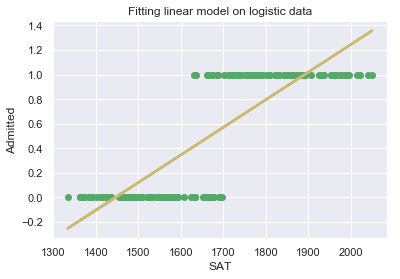

In [7]:
# Fit the linear regression model
reg_lin = sm.OLS(y,x)                              # OLS Linear Regression Model
results_lin = reg_lin.fit()                        # Fit the model and get the coefficients

print(results_lin.summary())                       # Print elaborate result summary 

print(results_lin.params)                          # Fetch only the coefficients b0 and b1.
print(results_lin.params[0])
print(results_lin.params[1])

# Construct the linear regression line equation: y= b0 + b1*x
y_hat = results_lin.params[0] + results_lin.params[1] * x1

# Create a scatter plot
plt.scatter(x1, y, color='C2')             # Plot the observations 
plt.plot(x1, y_hat, lw=2.5, color='C8')    # Plot the regression line
plt.title("Fitting linear model on logistic data", fontsize=12)
plt.xlabel("SAT", fontsize=12)
plt.ylabel("Admitted", fontsize=12)
plt.show()

# Inference: 
1. This regression line doesnt make much sense and we cannot make predictions out of it for different values of x. 
   Also this regression line predicts values of y, outside the possible domain values of x i.e. for x > 1 and for x < 0. This is    incorrect. The regression is totally oblivious of the fact that the values of x are bounded between 0 and 1. 
   
2. Thus linear regression is not appropriate for this case. It also violates the basic assumption of simple linear regression viz...Linearity i.e. there should be a linear relationship in between x and y. Our DATA is NON-LINEAR. Thus we must use non-linear approaches. 

We will now perform logistic regression. 

# Logistic Regression - Theory
1. Logistic regression is a specialised form of regression, which is formulated to predict a categorical variable. It accomodates the nonmetric variables through dummy variable coding. Logistic regression is therefore used to estimate the relationship in between a single BINARY DV and a set of numeric and/or categorical variables [IV's]. 

2. Logistic regression is used in applications where we need to CLASSIFY or categorize the group to which the object belongs to. For e.g. The success/failure of a new product, person should be granted loan/not depending upon his credit history.  

3. MEANING OF REGRESSION COEFFCIENTS IN LOGISTIC REGRESSION: Assume that the DV is gender [Male:1, Female:0]. Assume that event of the gender being male is SUCCESS, then the IV's represent the IMPACT on the LIKELIHOOD OF SUCCESS. In order words, LOGISTIC REGRESSION PREDICTS THE PROBABILITY OF AN EVENT OCCURING. Since the binary DV can take values only 0 and 1, the PREDICTED VALUE (probability) must be bounded to fall within the same range. In other words: regression coefficient b1 = Associated change in probability that Y_predicted = 1, with a unit change in X.  

4. The LOGISTIC REGRESSION uses the LOGISTIC CURVE to represent the relationship in between the IV and DV. At low levels of the IV, the logistic curve approaches 0 but never reaches it. As the IV increases, the curve approaches 1.0 but never exceeds it. A linear regression model, even with additional terms of Non_Linear Transformation can NEVER guarantee that the predicted values will lie in between 0 and 1. 

5. WHY LOGISTIC? When the dependent variable is of binary nature i.e. 0 or 1 i.e. discrete, the corresponding Error term follows BINOMIAL DISTRIBUTION, instead of the NORMAL DISTRIBUTION [This violates the assumption of MLR]. Secondly the VARIANCE OF A DICHOTOMOUS VARIABLE IS NOT CONSTANT, creating HETEROSCEDASTICITY. Both these 2 violations cannot be eliminated through transformations of the DV or IV. Logistic regression, however is capable of handling both these issues. 

6. ASSUMPTIONS OF LOGISTIC REGRESSION:
 As such Logistic regression doesnt have much assumptions: 
 
 6.1] Doesnt require any specific distributional form of the IV
 
 6.2] Capable of handling heteroscedasticity 
 
 6.3] Does not require linear relationship in between the IV and DV. 
 
 6.4] Can handle non-linear relationships between IV and DV, even when exponential or polynomial terms are not explicitly added       as additional IV [owing to transformations]
 
7. HOW TO PREDICT GROUP MEMEBERSHIP FROM LOGISTIC CURVE?
 Logistic regression technique predicts the probability in between 0 & 1. Plotting the predicted values (probabilities) for all values of the IV, generates an S-shaped curve. If the predicted value (probability) > 0.50 then the prediction is that the evet occurred/ is a success/ outcome is 1. If the predicted value <= 0.50, the event was a failure i.e. outcome is 0. Thus the logistic regression predicts the group membership using 0.50 as its CUTOFF VALUE, unless otherwise specified. Once we have the predicted membership, we can create a CLASSIFICATION MATRIX and assess, PREDICTIVE ACCURACY. 
 
8. TRANSFORMING THE PROBABILITY INTO ODDS AND LOGIT VALUES: 
 Similar to MLR, the Logistic regression predicts a metric (or numeric) DV. In this case, its the probability values constrained in between 0 and 1. It is the LOGISTIC TRANSFORMATION, that ensures that the predicted values (probabilities) never fall outside this range [0,1]. The LOGISTIC TRANSFORMATION is a 2 step process:
 
 8.1] Restating a PROBABILITY as ODDS:
 
 Probability = success/ (Success + Failure)
 
 Odds = Success/ Failure = p/(1-p) = Prob(Occurring)/ Prob(Not Occurring)
 
 Odds Ratio = Odds1/Odds0 = [p1/(1-p1)]/[p0/(1-p0)]   * NOTE: Larger odds are usually the numerator. 
 
 8.2] Calculating the LOGIT VALUE:
 
                             Logit = NATURAL LOG OF ODDS 
                             => ln(p/(1-p)) = beta0 + beta1.x1
                             => p/(1-p) = e^(beta0 + beta1.x1)
                             => p = (1-p) . e^(beta0 + beta1.x1)
                             => p = e^(beta0 + beta1.x1) - p.e^(beta0 + beta1.x1)
                             => p(1 + e^(beta0 + beta1.x1)) = e^(beta0 + beta1.x1)
                             => p = [e^(beta0 + beta1.x1)] / [1 + e^(beta0 + beta1.x1)] = Estimated regression Equation
                             
 Generalizing it: P(Y = 1| X1, X2, X3.....Xk) = F(beta0 + beta1.x1 + beta2.x2........+ betak.xk), 
 
 where F = cumulative distribution function (Logistic(in case of Logit) or Std Normal (in case of Probit))

# Logistic Regression - Practicals

In [8]:
reg_log = sm.Logit(y,x)                     # Logistic regression Model
results_log = reg_log.fit()                 # Fit the model
results_log.summary()                       # Print the summary

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Jan 2019   Pseudo R-squ.:                  0.7992
Time:                        16:28:38   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

-69.9128021761969
0.04200486669376746


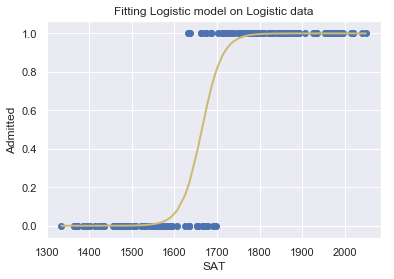

In [9]:
# Lets draw the curve using the regression equation, obtained above. 
beta0 = results_log.params[0]
beta1 = results_log.params[1]
print(beta0)
print(beta1)

# Now lets compute the logit value(s) using the formula: e^(beta0 + beta1.x1)/[1 + e^(beta0 + beta1.x1)]
def f(x,b0,b1):
    return np.array(np.exp(b0 + b1*x)/(1 + np.exp(b0 + b1*x)))    # Returns a numpy array. 

# The predicted probabilities - sorted
prob_sorted = np.sort(f(x1, beta0, beta1))
# The IV - sorted
x_sorted = np.sort(np.array(x1))

# Lets plot the original data and then overlay the LOGISTIC CURVE, by plotting the LOGIT values stored in prob_sorted. 
plt.scatter(x1, y, color='C0')
plt.title("Fitting Logistic model on Logistic data")
plt.xlabel("SAT", fontsize = 12)
plt.ylabel("Admitted", fontsize = 12)
plt.plot(x_sorted, prob_sorted, color = 'C8', lw = 2)
plt.show()


# Inference:
1. Logistic regression curve is a typical S-Shaped curve. 

2. Observe that the Logistic curve is bounded by 0 and 1. Therefore the logistic regression is also referred to as Binary Regression.

3. The function f() we wrote above computed the PROBABILITY OF ADMISSION, given an SAT score. To elaborate further, when the SAT score is relatively low (1300 - 1500), the probability of admissions is relatively low (almost 0). Vice versa when the SAT score is relatively high (1800-2000), the probability of getting admitted is 1 or 100%. 

4. The SAT score between 1600 to 1700 is uncertain and there is a probability associated with the student getting admitted. For e.g. if the students SAT score is 1650, the probability of getting admitted is 0.5 i.e. there is a 50% chance of a student to get admitted with that SAT score. Similarly if the SAT score is 1700, the probability of getting admitted is 0.8 or 80%. 
